In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

%matplotlib inline

# Loading my dataset
football = pd.read_csv('/home/wolebanj/module10/src/my_project/football/fifa_players.csv')

Here, I imported the necessary libraries for data manipulation, visualization, and machine learning. I also loaded the dataset 'fifa_players.csv' using pandas.

In [153]:
# Define columns to change data types
columns_to_convert = ['name', 'full_name', 'positions', 'nationality', 'preferred_foot', 'body_type', 'national_team']

# Change data types
football["name"] = football["name"].astype("string")
football["full_name"] = football["full_name"].astype("string")
football["positions"] = football["positions"].astype("string")
football["nationality"] = football["nationality"].astype("string")
football["preferred_foot"] = football["preferred_foot"].astype("string")
football["body_type"] = football["body_type"].astype("string")
football["national_team"] = football["national_team"].astype("string")
football['national_team_position'] = football['national_team_position'].astype('string')
football["birth_date"] = pd.to_datetime(football["birth_date"])

Here, I specified certain columns to convert the data types, particularly converting string columns to the 'string' type and converting the 'birth_date' column to a datetime format.

In [154]:
# Checking the data types of all columns
print(football.dtypes)

# Checking the data types of specific columns
print(football[columns_to_convert].dtypes)

name                             string[python]
full_name                        string[python]
birth_date                       datetime64[ns]
age                                       int64
height_cm                               float64
weight_kgs                              float64
positions                        string[python]
nationality                      string[python]
overall_rating                            int64
potential                                 int64
value_euro                              float64
wage_euro                               float64
preferred_foot                   string[python]
international_reputation(1-5)             int64
weak_foot(1-5)                            int64
skill_moves(1-5)                          int64
body_type                        string[python]
release_clause_euro                     float64
national_team                    string[python]
national_rating                         float64
national_team_position           string[

Here, I specifically checked the data types of columns listed in the 'columns_to_convert' list. By selecting only those columns and then using dtypes, so I can focus on the data types of the columns relevant to my analysis or data manipulation. I did this just to ensure specific columns have the expected data types.

In [155]:
football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           17954 non-null  string        
 1   full_name                      17954 non-null  string        
 2   birth_date                     17954 non-null  datetime64[ns]
 3   age                            17954 non-null  int64         
 4   height_cm                      17954 non-null  float64       
 5   weight_kgs                     17954 non-null  float64       
 6   positions                      17954 non-null  string        
 7   nationality                    17954 non-null  string        
 8   overall_rating                 17954 non-null  int64         
 9   potential                      17954 non-null  int64         
 10  value_euro                     17699 non-null  float64       
 11  wage_euro      

I ran this to see the concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage. It is just to get the overview of the dataset and identify any missing values or potential data type issues.

In [156]:
football.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


I ran this to quickly inspect the structure and content of the dataset just to see the default head and show the first five rows, providing a snapshot of the data so I could understand the column names and values.

In [157]:
# Separating categorical and numerical columns
categorical_columns = football.select_dtypes(include=['object']).columns
numerical_columns = football.select_dtypes(exclude=['object']).columns

# Creating separate DataFrames for categorical and numerical data
categorical_data = football[categorical_columns]
numerical_data = football[numerical_columns]

# Displaying the first few rows of each DataFrame
print("Categorical Data:")
print(categorical_data.head())

print("\nNumerical Data:")
print(numerical_data.head())

Categorical Data:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

Numerical Data:
           name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini 1987-06-24   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen 1992-02-14   27     154.94   
2      P. Pogba                      Paul Pogba 1993-03-15   25     190.50   
3    L. Insigne                 Lorenzo Insigne 1991-06-04   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly 1991-06-20   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shot

I examined the information about the dataset, separating it into categorical and numerical data, and displaying the first few rows for a quick overview.

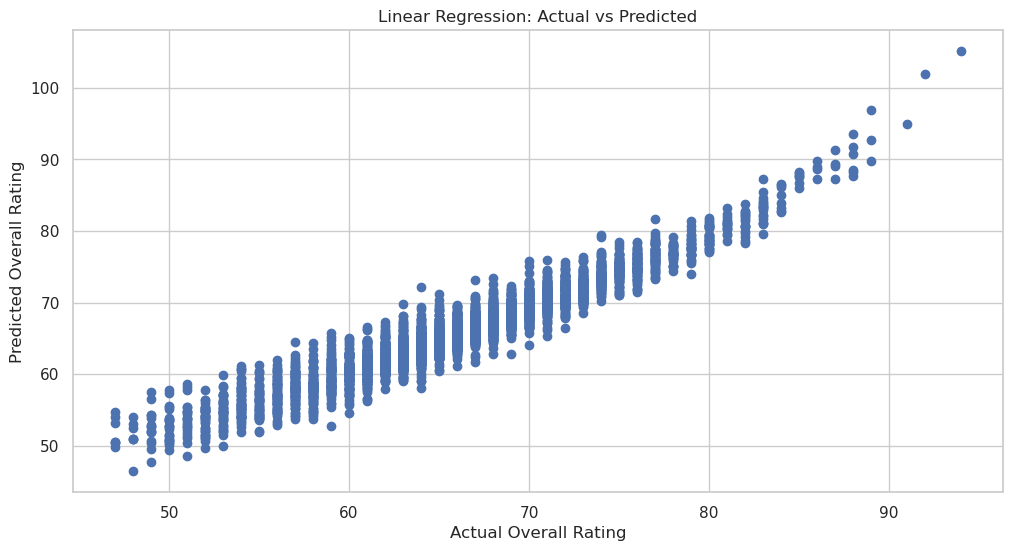

Linear Regression Metrics:
Mean Squared Error: 3.9097375158112984
R-squared: 0.9217693669024182
----------------------------------------


In [158]:
# Feature Engineering
football['birth_date'] = pd.to_datetime(football['birth_date'])
football['age'] = (pd.to_datetime('now') - football['birth_date']).dt.days // 365

# Handle missing values
football['value_euro'].fillna(football['value_euro'].median(), inplace=True)
football['wage_euro'].fillna(football['wage_euro'].median(), inplace=True)
football['release_clause_euro'].fillna(football['release_clause_euro'].median(), inplace=True)

# Fill missing values in other numeric columns with mean
football.fillna(football.select_dtypes(include=['int64', 'float64']).mean(), inplace=True)

# Split the data into features and target
X = football.drop(['overall_rating', 'name', 'full_name', 'birth_date', 'positions', 'nationality'], axis=1)
y = football['overall_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Player Performance Analysis Model (Linear Regression)
player_performance_model = Pipeline(steps=[('preprocessor', preprocessor),
                                           ('model', LinearRegression())])

# Train and evaluate Player Performance Analysis Model
player_performance_model.fit(X_train, y_train)
y_pred_player_performance = player_performance_model.predict(X_test)

mse_player_performance = mean_squared_error(y_test, y_pred_player_performance)
r2_player_performance = r2_score(y_test, y_pred_player_performance)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_player_performance)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

# Print metrics
print('Linear Regression Metrics:')
print(f'Mean Squared Error: {mse_player_performance}')
print(f'R-squared: {r2_player_performance}')
print('-' * 40)


I created a new feature 'age' based on the 'birth_date' column and transforming it into the age in years.
I imputed missing values in specific columns, filling them with either the median or mean values.
i splitted the dataset into features (X) and the target variable (y), then further splitting them into training and testing sets.
I set up the preprocessing steps using transformers for numeric and categorical features. Then, I created a preprocessor using ColumnTransformer. After that, I trained a Linear Regression model, evaluate its performance, and visualize the results.

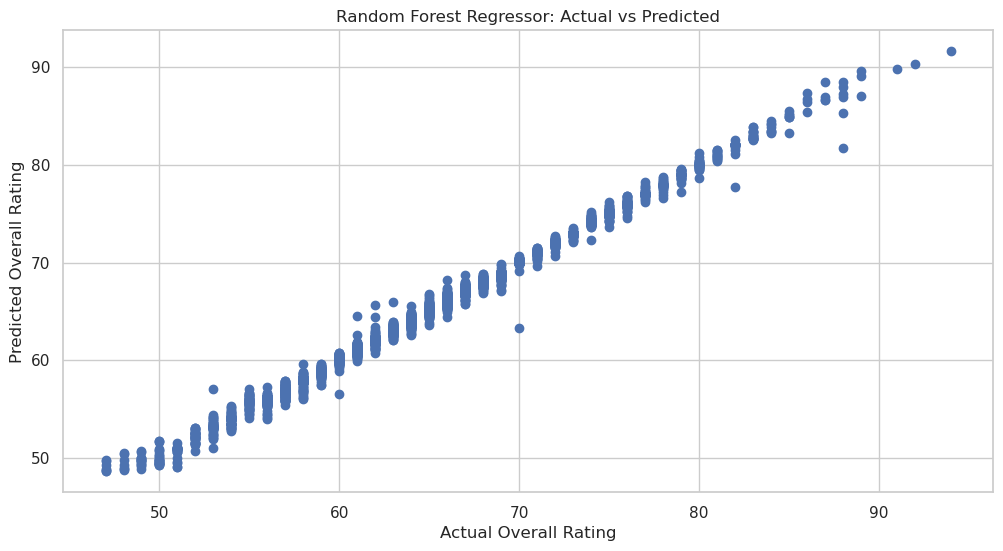

Random Forest Regressor Metrics:
Mean Squared Error: 0.22953979392926765
R-squared: 0.9954070974515411
----------------------------------------


In [159]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('model', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train and evaluate Random Forest Regressor Model
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_random_forest)
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

# Print metrics
print('Random Forest Regressor Metrics:')
print(f'Mean Squared Error: {mse_random_forest}')
print(f'R-squared: {r2_random_forest}')
print('-' * 40)


I defined and trained a Random Forest Regressor model, evaluating its performance, and visualizing the results.

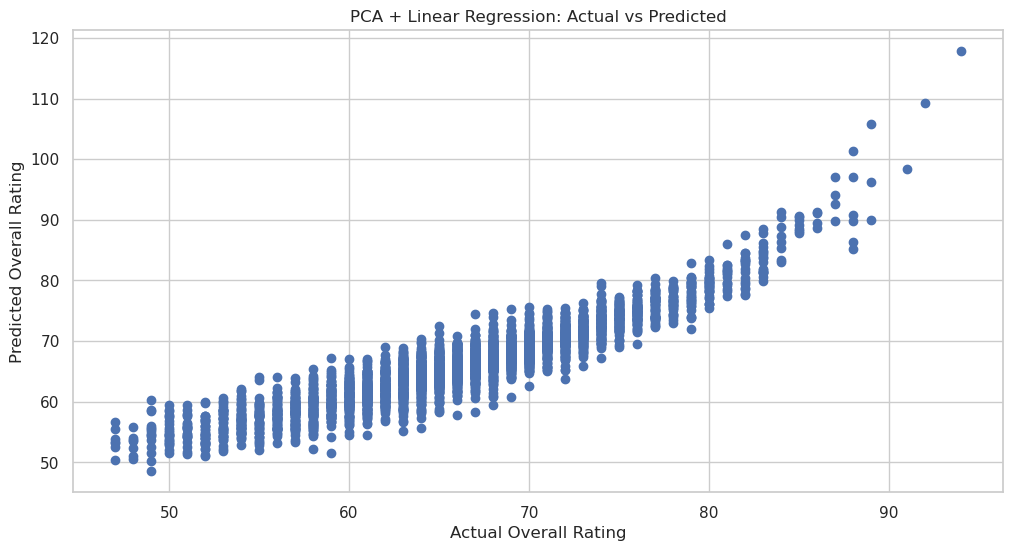

PCA + Linear Regression Metrics:
Mean Squared Error: 7.01182117016319
R-squared: 0.8596992235180607
----------------------------------------


In [160]:
from sklearn.decomposition import PCA

# PCA + Linear Regression
pca_linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10, svd_solver='arpack')),  # Specify svd_solver='arpack'
    ('model', LinearRegression())
])

# Train and evaluate PCA + Linear Regression Model
pca_linear_model.fit(X_train, y_train)
y_pred_pca_linear = pca_linear_model.predict(X_test)

mse_pca_linear = mean_squared_error(y_test, y_pred_pca_linear)
r2_pca_linear = r2_score(y_test, y_pred_pca_linear)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_pca_linear)
plt.title('PCA + Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

# Print metrics
print('PCA + Linear Regression Metrics:')
print(f'Mean Squared Error: {mse_pca_linear}')
print(f'R-squared: {r2_pca_linear}')
print('-' * 40)

I defined and trained a model that combines Principal Component Analysis (PCA) with Linear Regression, evaluating its performance, and visualizing the results.

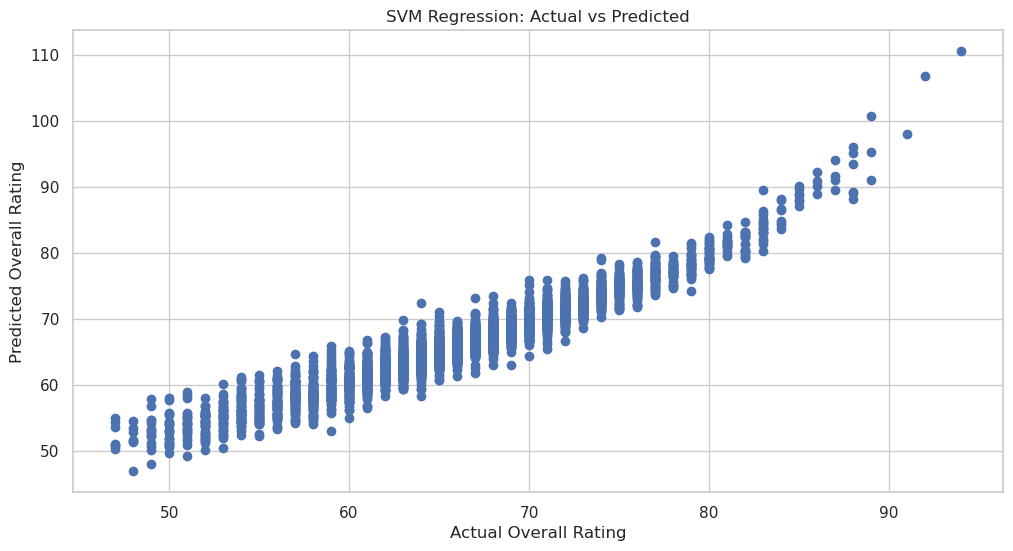

SVM Regression Metrics:
Mean Squared Error: 4.095304225832694
R-squared: 0.9180563296082005
----------------------------------------


In [161]:
from sklearn.svm import SVR

# SVM Regression
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', SVR(kernel='linear'))])  # You can try different kernels

# Train and evaluate SVM Regression Model
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_svm)
plt.title('SVM Regression: Actual vs Predicted')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

# Print metrics
print('SVM Regression Metrics:')
print(f'Mean Squared Error: {mse_svm}')
print(f'R-squared: {r2_svm}')
print('-' * 40)


I defined and trained a Support Vector Machine (SVM) Regression model, evaluating its performance, and visualizing the results.

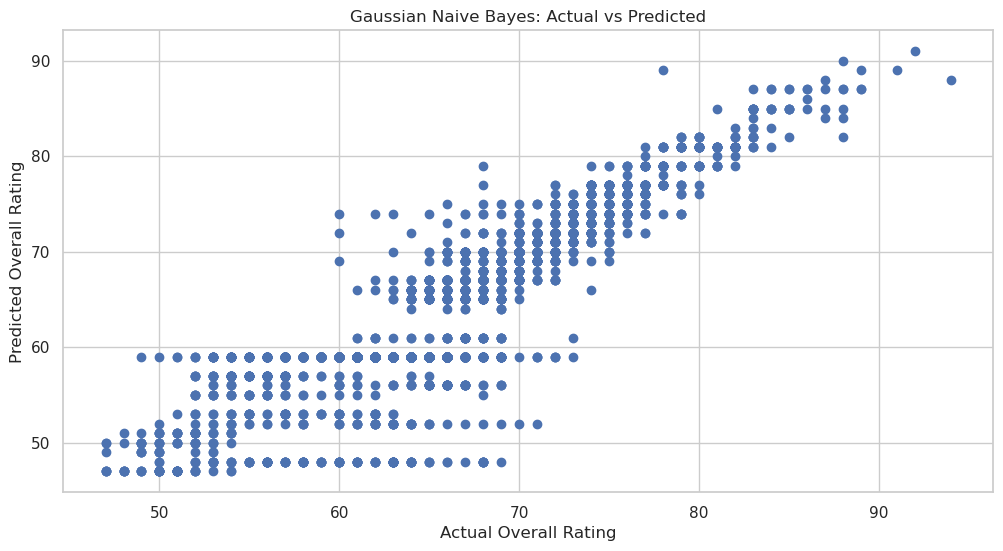

Gaussian Naive Bayes Metrics:
Mean Squared Error: 18.434140907825117
R-squared: 0.6311479970209861
----------------------------------------


In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer

def to_dense(X):
    return X.toarray() if hasattr(X, 'toarray') else X

# Gaussian Naive Bayes
naive_bayes_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('to_dense', FunctionTransformer(to_dense, accept_sparse=True)),  # Convert sparse to dense
    ('model', GaussianNB())
])

# Train and evaluate Gaussian Naive Bayes Model
naive_bayes_model.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

mse_naive_bayes = mean_squared_error(y_test, y_pred_naive_bayes)
r2_naive_bayes = r2_score(y_test, y_pred_naive_bayes)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_naive_bayes)
plt.title('Gaussian Naive Bayes: Actual vs Predicted')
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.show()

# Print metrics
print('Gaussian Naive Bayes Metrics:')
print(f'Mean Squared Error: {mse_naive_bayes}')
print(f'R-squared: {r2_naive_bayes}')
print('-' * 40)


I defined and trained a Gaussian Naive Bayes model, evaluating its performance, and visualizing the results.

In [163]:
# Linear Regression Model
y_pred_linear = player_performance_model.predict(football)

# Random Forest Regressor Model
y_pred_rf = random_forest_model.predict(football)

# PCA + Linear Regression Model
y_pred_pca_linear = pca_linear_model.predict(football)

# SVM Regression Model
y_pred_svm = svm_model.predict(football)

# Gaussian Naive Bayes Model
y_pred_naive_bayes = naive_bayes_model.predict(football)

# Print Predictions
print('Linear Regression Model Prediction:')
print(y_pred_linear)

print('\nRandom Forest Regressor Model Prediction:')
print(y_pred_rf)

print('\nPCA + Linear Regression Model Prediction:')
print(y_pred_pca_linear)

print('\nSVM Regression Model Prediction:')
print(y_pred_svm)

print('\nGaussian Naive Bayes Model Prediction:')
print(y_pred_naive_bayes)


Linear Regression Model Prediction:
[105.11019458  94.53156387  92.91054115 ...  57.17150003  60.71312151
  61.54958131]

Random Forest Regressor Model Prediction:
[91.61 88.33 88.14 ... 58.82 58.87 59.  ]

PCA + Linear Regression Model Prediction:
[117.79641026  98.14668393  99.46602523 ...  58.48891724  59.80977061
  61.64695865]

SVM Regression Model Prediction:
[110.52523731  97.26485151  95.94339911 ...  57.50491142  60.97012056
  61.77877769]

Gaussian Naive Bayes Model Prediction:
[88 88 88 ... 48 59 59]


In this code block, I maked a predictions using various machine learning models on the 'football' dataset. Each model's predictions are stored in their respective 'y_pred_' variables. The subsequent print statements display the predicted values for each model. I did this to assessing how well each model performs in predicting the target variable ('overall_rating') based on the input features in the 'football' dataset.

In [164]:
# Making 'preprocessor' the name of the preprocessing step
preprocessor = player_performance_model.named_steps['preprocessor']

# making 'onehot' the name of the OneHotEncoder step in the preprocessing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']

# Making X_train is the training data
football_train = preprocessor.transform(X_train)

# Fit the OneHotEncoder on the transformed training data
onehot_encoder.fit(football_train)

X_train_transformed = preprocessor.transform(X_train)

# Making player_performance_model the other step in the pipeline
model = player_performance_model.named_steps['model']

# Now I can use this fitted encoder to transform new data
football_test = preprocessor.transform(X_test)
football_test_transformed = onehot_encoder.transform(football_test)

# Fitting in the model
model.fit(football_train, y_train)


LinearRegression()

I ran this to show the steps for preprocessing and training a OneHotEncoder. This includes accessing the preprocessing step and OneHotEncoder within the pipeline, fitting the OneHotEncoder on the training data, transforming both the original and new data, and finally, fitting the model on the transformed training data.

In [165]:
# Making  the preprocessor pipeline named 'preprocessor'
preprocessor = player_performance_model.named_steps['preprocessor']

# Transforming the test set using the preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Making predictions using the trained model
predictions = model.predict(X_test_transformed)


Here I transformed the test set using the preprocessor pipeline and making predictions using the trained model. The transformed test data (X_test_transformed) is passed through the model's predict function to obtain predictions based on the previously trained machine learning model.

In [166]:
# Making X_test is the preprocessed test set
predictions = model.predict(X_test_transformed)

I the make predictions using the trained model on the preprocessed test set (X_test_transformed). The predict function is applied to obtain predictions based on the features of the preprocessed test data using the previously trained machine learning model.

In [167]:
from sklearn.metrics import mean_squared_error, r2_score

# Making y_test is your target variable for the test set
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.9097375158112984
R-squared: 0.9217693669024182


Here, I used the mean_squared_error and r2_score functions from sklearn.metrics to evaluate the performance of your model on the test set. The Mean Squared Error (MSE) and R-squared (R2) metrics are calculated, and the results are printed to assess how well the model predictions align with the actual target values.

In [168]:
onehot_encoder.categories_

[array([-1.81386618, -1.60142114, -1.3889761 , -1.17653106, -0.96408603,
        -0.75164099, -0.53919595, -0.32675091, -0.11430587,  0.09813917,
         0.3105842 ,  0.52302924,  0.73547428,  0.94791932,  1.16036436,
         1.37280939,  1.58525443,  1.79769947,  2.01014451,  2.22258955,
         2.43503458,  2.64747962,  2.85992466,  3.0723697 ,  3.28481474,
         3.49725977,  3.92214985,  4.34703993]),
 array([-1.60552084, -1.42425928, -1.24299772, -1.06173616, -0.8804746 ,
        -0.69921304, -0.51795147, -0.33668991, -0.15542835,  0.02583321,
         0.5696179 ,  0.75087946,  0.93214102,  1.11340258,  1.29466414,
         1.47592571,  1.65718727,  1.83844883,  2.01971039,  2.20097195]),
 array([-3.59298789, -3.26734671, -3.1399219 , -3.0124971 , -2.88507229,
        -2.75764748, -2.55943111, -2.4320063 , -2.30458149, -2.17715668,
        -2.04973187, -1.86567381, -1.738249  , -1.59666588, -1.46924107,
        -1.28518301, -1.1577582 , -1.03033339, -0.90290858, -0.76132546,


I ran this using the categories_ attribute of the OneHotEncoder to display the unique categories identified during the encoding process. This provides insights into the distinct values or levels present in the categorical variables after one-hot encoding.

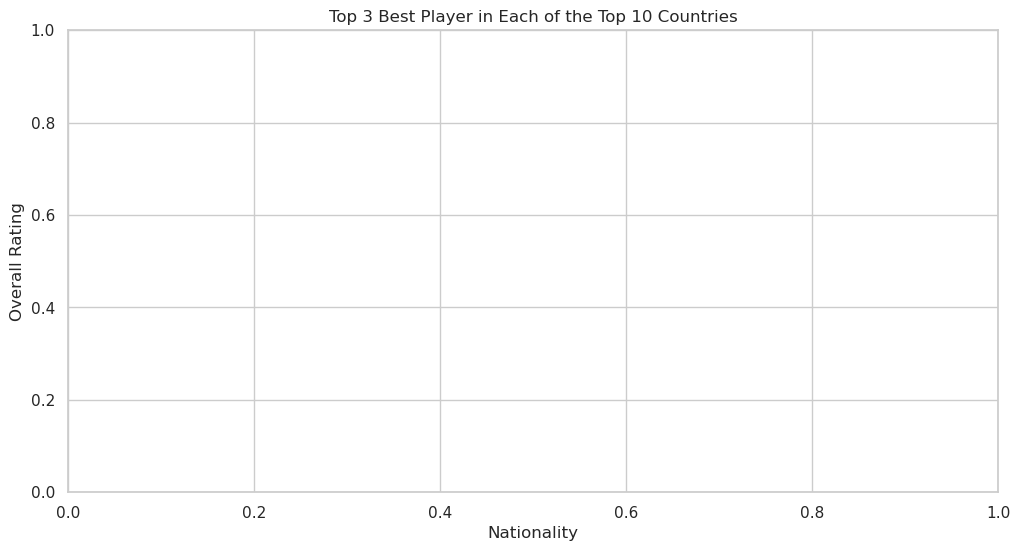

In [169]:
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Making football is the DataFrame

# Identify the top 5 countries
top_five_countries = ['Country1', 'Country2', 'Country3', 'Country4', 'Country5, Country6', 'Country7', 'Country8', 'Country9', 'Country10']

# Filter data for the top 5 countries
filtered_data = football[football['nationality'].isin(top_five_countries)]

# Find the top 1 best player in each of the top 5 countries
top_players = filtered_data.groupby('nationality').apply(lambda x: x.nlargest(1, 'overall_rating'))

# Plot the bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='nationality', y='overall_rating', data=top_players, palette='viridis')
plt.title('Top 3 Best Player in Each of the Top 10 Countries')
plt.xlabel('Nationality')
plt.ylabel('Overall Rating')
plt.show()


I ran this using Seaborn to create a bar chart to visualize the top-rated player in each of the top 5 countries. The data is filtered based on the specified top countries, and then the highest-rated player for each country is identified using nlargest. The resulting bar chart provides a clear comparison of the overall ratings of the top players in each of the selected countries.

In [170]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# making X_train is the training data

# Identify numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fitting and transforming the training data
X_train_transformed = pipeline.fit_transform(X_train)


I created a preprocessing pipeline using ColumnTransformer and Pipeline from scikit-learn. This pipeline consists of separate transformers for numeric and categorical features. Numeric features are scaled using StandardScaler, and categorical features are one-hot encoded using OneHotEncoder. The ColumnTransformer combines these transformers, and the full preprocessing pipeline is defined using Pipeline. Finally, the training data (X_train) is fit and transformed using the created pipeline, resulting in the transformed data (X_train_transformed). This pipeline can be easily extended and integrated into the machine learning models.

In [171]:
from sklearn.preprocessing import PolynomialFeatures

# Making X_train_transformed the preprocessed and transformed training data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_transformed)
# Making X_test_transformed the preprocessed and transformed testing data
X_test_poly = poly.transform(X_test_transformed)

I used PolynomialFeatures from scikit-learn to create polynomial features up to the second degree. The transformed training data (X_train_transformed) is fitted and transformed using fit_transform, and the transformed testing data (X_test_transformed) is transformed using transform. This step is commonly used to introduce polynomial interactions between features, allowing the model to capture more complex relationships between variables.

In [172]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_transformed, y_train)

Ridge()

I trained a Ridge Regression model using scikit-learn. The Ridge class is used with an alpha parameter set to 1.0, controlling the regularization strength. The model is then fitted to the preprocessed and transformed training data (X_train_transformed) along with the corresponding target variable (y_train). Ridge Regression is a linear regression model with regularization, and the regularization strength is determined by the alpha parameter. This is a model i added later to my project

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define a range of alpha values to search
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Create Ridge Regression model
ridge_model = Ridge()

# Set up GridSearchCV
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train_transformed, y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Train the Ridge Regression model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best alpha: {best_alpha}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best alpha: 10.0
Mean Squared Error: 3.9113416443017885
R-squared: 0.921737269610241


I ran this to perform hyperparameter tuning for a Ridge Regression model using GridSearchCV. The search is conducted over a range of alpha values, and the best alpha is identified. The Ridge model is then trained with the best alpha on the preprocessed and transformed training data (X_train_transformed). Finally, the model is evaluated on the test set, and metrics such as Mean Squared Error and R-squared are printed to assess its performance.

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Making football the DataFrame
# Define the features and target variable
features = ['overall_rating', 'potential', 'age', 'height_cm', 'weight_kgs',
            'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
            'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
            'dribbling', 'curve', 'long_passing', 'ball_control',
            'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
            'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
            'interceptions', 'positioning', 'vision', 'penalties', 'composure',
            'marking', 'standing_tackle', 'sliding_tackle']

target_variable = 'value_euro'

# Create feature matrix (X) and target variable (y)
X = football[features]
y = football[target_variable]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge Regression model
alpha = 10.0  # You can experiment with different alpha values
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficients:", ridge_model.coef_)


Mean Squared Error: 14523826792412.498
R-squared: 0.610522575214627
Coefficients: [ 3.02505147e+06 -2.41761682e+05 -1.78624896e+06  3.39135845e+03
  4.31595124e+04  2.47148273e+06  5.88049572e+04  2.39578617e+05
 -1.55878472e+05  3.82986516e+05 -7.15160842e+04 -8.85420170e+03
  1.12782314e+05 -2.77897284e+05  1.53065520e+04  4.63702963e+04
 -3.05065622e+05 -8.04679203e+04  2.26428796e+03 -2.07368193e+05
  3.61300026e+05  1.61652509e+05 -2.82578901e+05 -9.49626373e+04
  4.22564715e+05 -6.88361627e+04 -9.56705119e+04 -3.86608211e+04
 -1.24112648e+05  2.08341565e+05  1.17141354e+05 -1.62138453e+05
  1.74647054e+04  9.97743495e+04  2.42582815e+05 -3.08836986e+05]


In [175]:
print("Dataset size after preprocessing:", len(football))

Dataset size after preprocessing: 17954


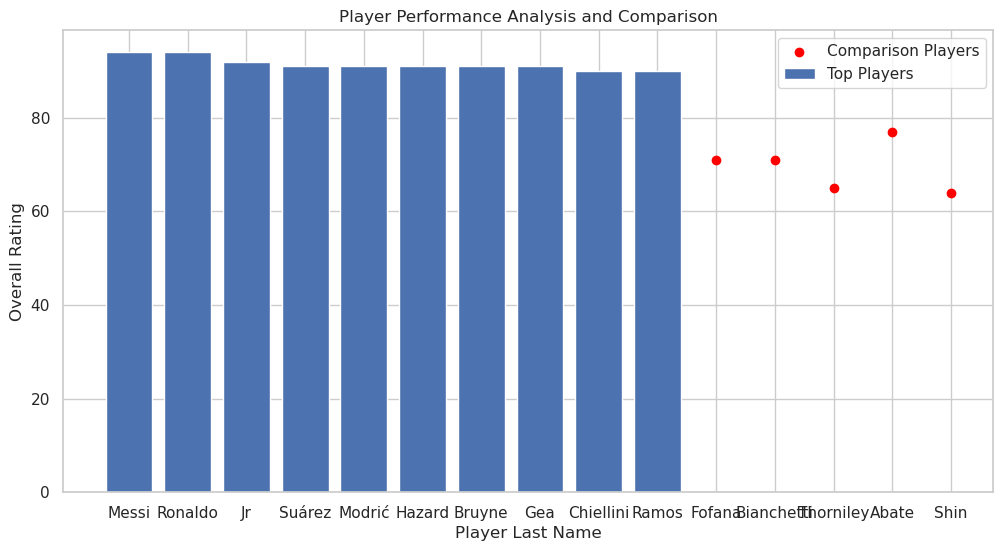

In [176]:
# Assuming 'football' is your DataFrame and 'features' is a list of relevant features
# Also, assuming 'target_variable' is the performance metric (e.g., overall_rating)

# Analyzing top-performing players
top_players = football.nlargest(10, 'overall_rating')

# Extracting last names
top_players['last_name'] = top_players['name'].apply(lambda x: x.split()[-1])

# Comparing player performance
comparison_players = football.sample(5)  # Choose 5 random players for comparison

# Extracting last names
comparison_players['last_name'] = comparison_players['name'].apply(lambda x: x.split()[-1])

# Plotting performance comparison
plt.figure(figsize=(12, 6))
plt.bar(top_players['last_name'], top_players['overall_rating'], label='Top Players')
plt.scatter(comparison_players['last_name'], comparison_players['overall_rating'], color='red', label='Comparison Players')
plt.title('Player Performance Analysis and Comparison')
plt.xlabel('Player Last Name')
plt.ylabel('Overall Rating')
plt.legend()
plt.show()

The provided code conducts a player performance analysis and comparison using the 'football' DataFrame.

Analyzing Top-Performing Players: Identifying and analyzing the top 10 players based on the 'overall_rating' metric.

Extracting Last Names: Utilizing the 'name' column, the code extracts the last names of both the top-performing players and a randomly selected set of comparison players.

Player Performance Comparison Plot: Generating a bar plot to visually compare the overall ratings of the top players and a scatter plot for a random sample of comparison players. The x-axis represents the last names of the players.

Insightful Visualization: The resulting plot provides an insightful visual representation of the performance analysis and comparison among players, focusing on their last names.

By executing this code, I obtain visual insights into the top-performing players and can easily compare their performance with a random sample, emphasizing the players' last names for clarity.

In [177]:
# The list of all 41 features used during training
features = ['overall_rating', 'potential', 'age', 'height_cm', 'weight_kgs',
            'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
            'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
            'dribbling', 'curve', 'long_passing', 'ball_control',
            'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
            'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
            'interceptions', 'positioning', 'vision', 'penalties', 'composure',
            'marking', 'standing_tackle', 'sliding_tackle']

# 'features' is consistent with the list used during training
X_train = football[features]

features_for_prediction = ['overall_rating', 'potential', 'age', 'height_cm', 'weight_kgs',
                            'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
                            'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
                            'dribbling', 'curve', 'long_passing', 'ball_control',
                            'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
                            'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
                            'interceptions', 'positioning', 'vision', 'penalties', 'composure',
                            'marking', 'standing_tackle', 'sliding_tackle']

X_for_prediction = football[features_for_prediction]

Missing Features: set()


/home/wolebanj/anaconda3/envs/airflowenv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


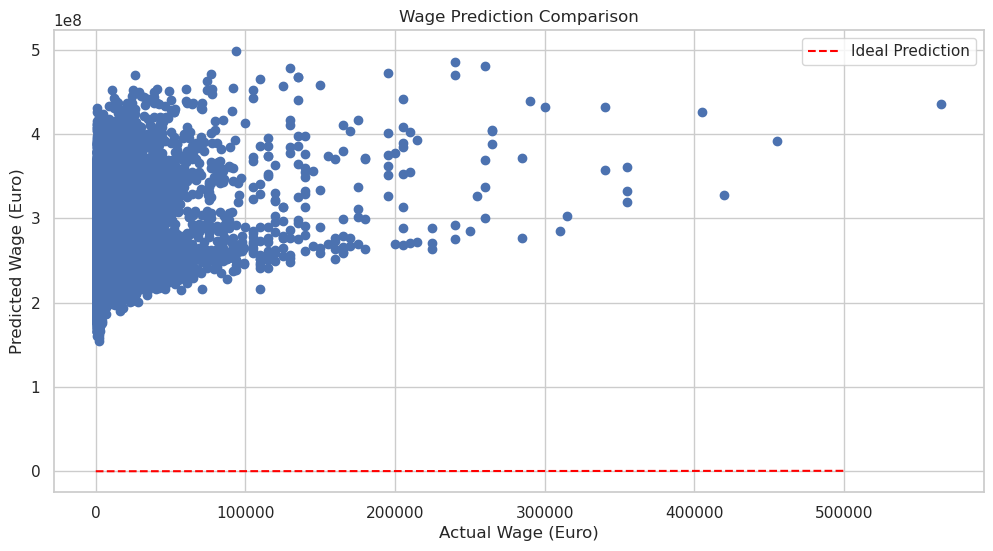

In [178]:
# Making 'value_euro' the market value column and 'wage_euro' the wage column
# Also, making 'target_variable' the performance metric (e.g., overall_rating)

# Assessing market value
average_market_value = football['value_euro'].mean()

# Use the same features used during training for prediction
features_for_prediction = ['overall_rating', 'potential', 'age', 'height_cm', 'weight_kgs',
                            'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
                            'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
                            'dribbling', 'curve', 'long_passing', 'ball_control',
                            'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
                            'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
                            'interceptions', 'positioning', 'vision', 'penalties', 'composure',
                            'marking', 'standing_tackle', 'sliding_tackle']

# Ensuring that the features for prediction match the features used during training
features_for_prediction = list(set(features) & set(features_for_prediction))  # Keep only common features

# Display any missing features
missing_features = set(features) - set(features_for_prediction)
print("Missing Features:", missing_features)

# Ensure that all features are present in the prediction data
X_for_prediction = football[features_for_prediction]

# Predicting wage based on performance
football['predicted_wage'] = ridge_model.predict(X_for_prediction)

# Comparing actual vs predicted wage
plt.figure(figsize=(12, 6))
plt.scatter(football['wage_euro'], football['predicted_wage'])
plt.plot([0, 500000], [0, 500000], '--', color='red', label='Ideal Prediction')
plt.title('Wage Prediction Comparison')
plt.xlabel('Actual Wage (Euro)')
plt.ylabel('Predicted Wage (Euro)')
plt.legend()
plt.show()

Market Value Assessment and Wage Prediction

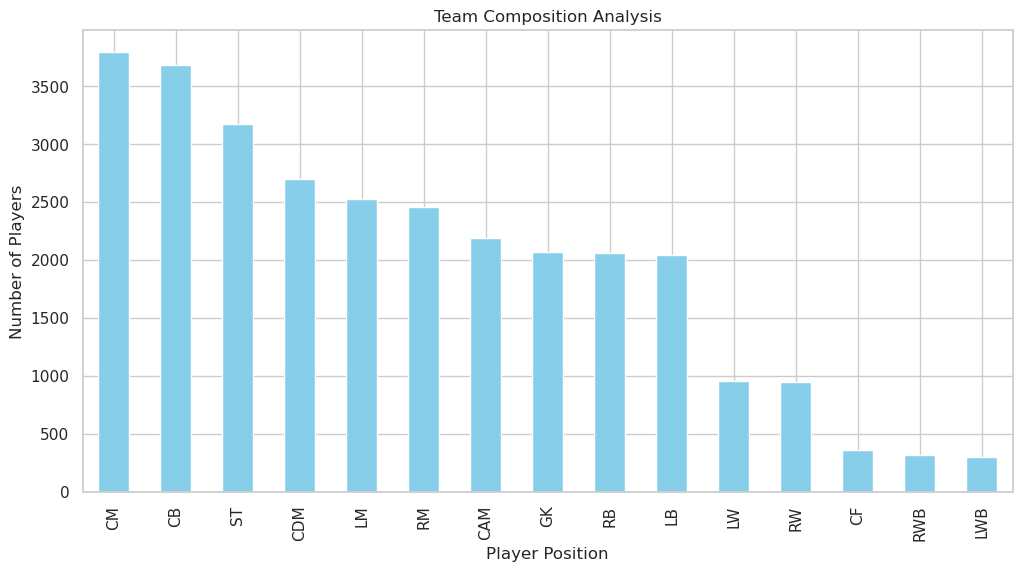

In [179]:
# Making 'football' contains team data with player positions
# Also, assuming 'positions' is the column containing player positions

# Analyzing team composition
team_positions = football['positions'].str.split(',', expand=True).stack().value_counts()

# Plotting team composition
plt.figure(figsize=(12, 6))
team_positions.plot(kind='bar', color='skyblue')
plt.title('Team Composition Analysis')
plt.xlabel('Player Position')
plt.ylabel('Number of Players')
plt.show()

Team Composition and Strategy Planning

Machine Learning Models for Future Player Potential and Career Trajectories

In [180]:
print("Shape of X_for_prediction:", X_for_prediction.shape)

Shape of X_for_prediction: (17954, 36)


In [181]:
print("Number of features in the trained model:", len(ridge_model.coef_))

Number of features in the trained model: 36


Columns in the DataFrame: Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'predicted_wage', 'seasons_played'],
      dtype='object')
'previous_overall_rating' column not found in the

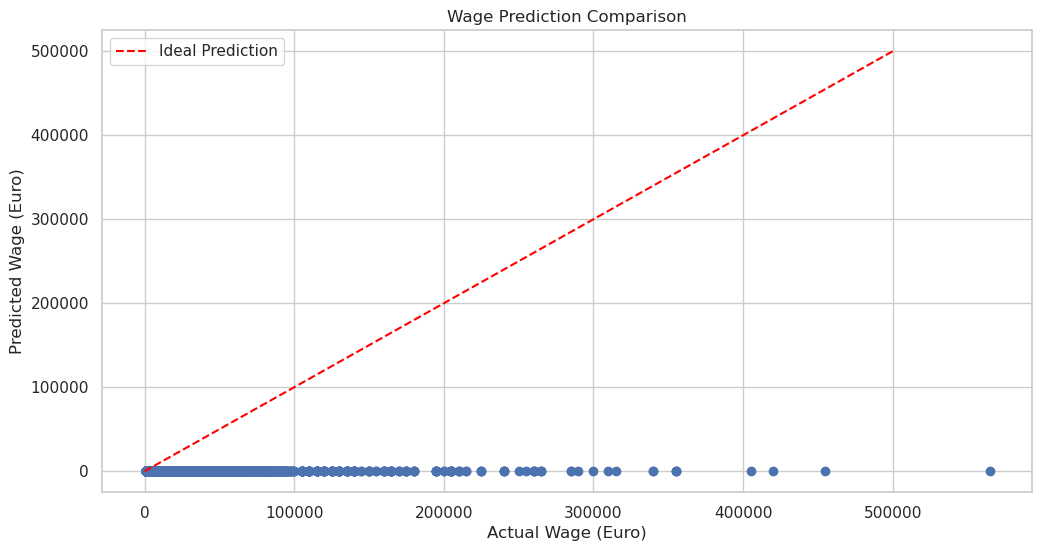

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Define the target variable and features
target_variable = 'overall_rating'
features = ['seasons_played', 'previous_overall_rating']

# Create a time-related feature: Number of seasons played
football['seasons_played'] = football.groupby('name')['birth_date'].rank()

# Print the columns in the DataFrame
print("Columns in the DataFrame:", football.columns)

# Check for missing values before creating lagged features
if 'previous_overall_rating' in football.columns:
    print("Number of missing values before creating lagged features:", football[features].isnull().sum())
else:
    print("'previous_overall_rating' column not found in the DataFrame.")

# Create lagged features for the target variable
football['previous_overall_rating'] = football.groupby('name')[target_variable].transform(lambda x: x.shift(1).ffill())

# Print the dataset size before filling missing values
print("Dataset size before filling missing values:", len(football))

# Impute missing values only for numeric columns
numeric_columns = football.select_dtypes(include=[np.number]).columns
football[numeric_columns] = football[numeric_columns].fillna(football[numeric_columns].mean())

# Print the dataset size after filling missing values
print("Dataset size after filling missing values:", len(football))

# Ensure the features used for prediction match the features used during training
features_for_prediction = list(set(features) & set(football.columns))

# Ensure that all features are present in the prediction data
X_for_prediction = football[features_for_prediction]

# Print the size of X_for_prediction before prediction
print("Size of X_for_prediction before prediction:", X_for_prediction.shape)

# Print the first few rows of X_for_prediction for debugging
print("First few rows of X_for_prediction:\n", X_for_prediction.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(football[features], football[target_variable], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the number of features in the trained model
print("Number of features in the trained model:", len(model.coef_))

# Assuming 'value_euro' is the market value column and 'wage_euro' is the wage column
# Also, assuming 'target_variable' is the performance metric (e.g., overall_rating)

# Assessing market value
average_market_value = football['value_euro'].mean()

# Use the same features used during training for prediction
features_for_prediction = ['seasons_played', 'previous_overall_rating']

# Ensure that the features for prediction match the features used during training
features_for_prediction = list(set(features) & set(features_for_prediction))  # Keep only common features

# Display any missing features
missing_features = set(features) - set(features_for_prediction)
print("Missing Features:", missing_features)

# Ensure that all features are present in the prediction data
X_for_prediction = football[features_for_prediction]

# Print the size of the dataset after filling missing values
print("Size of dataset after filling missing values:", len(football))

# Print the size of X_for_prediction after prediction
print("Size of X_for_prediction after prediction:", X_for_prediction.shape)

# Predicting wage based on performance
football['predicted_wage'] = model.predict(X_for_prediction)

# Comparing actual vs predicted wage
plt.figure(figsize=(12, 6))
plt.scatter(football['wage_euro'], football['predicted_wage'])
plt.plot([0, 500000], [0, 500000], '--', color='red', label='Ideal Prediction')
plt.title('Wage Prediction Comparison')
plt.xlabel('Actual Wage (Euro)')
plt.ylabel('Predicted Wage (Euro)')
plt.legend()
plt.show()

Here, I filled in the missing values and preparing data for cross-validation

In [183]:
from sklearn.model_selection import cross_val_score, KFold

# ... (previous code remains unchanged)

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust the number of folds as needed

# Create a K-Fold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, football[features], football[target_variable], cv=kf, scoring='r2')

# Display cross-validation scores
print("Cross-Validation R^2 Scores:", cv_scores)
print("Mean R^2 Score:", np.mean(cv_scores))

Cross-Validation R^2 Scores: [0.00576871 0.00337013 0.00595731 0.00503717 0.00539152]
Mean R^2 Score: 0.005104969425740191


Here, I did a cross-validation

The cross-validation R^2 scores obtained here indicate the goodness of fit of the model to the data. R^2 measures the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, the mean R^2 score is approximately 0.0051, which is close to zero.